<a href="https://colab.research.google.com/github/nityamshah/datascience/blob/main/unit9/NityShahU9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# The Dataset

**Citation**

https://archive.ics.uci.edu/dataset/174/parkinsons


Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering.

**About the Dataset**

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. The Multi-Dimensional Voice Program (MDVP) is a computer program that can calculate acoustic parameters from a voice sample

**Variable Information**

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation



**Loading the Dataset**

In [ ]:
url = 'https://raw.githubusercontent.com/nityamshah/datascience/main/data/parkinsons.data'
df = pd.read_csv(url)
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# Creating a tensor and splitting the data into training and testing

In [ ]:
df.drop(columns=["name"],inplace=True)
#convert to numpy array
df_matrix = df.to_numpy()
#convert to a PyTorch tensor
df_tensor = torch.from_numpy(df_matrix)
df_tensor

tensor([[1.1999e+02, 1.5730e+02, 7.4997e+01,  ..., 2.6648e-01, 2.3014e+00,
         2.8465e-01],
        [1.2240e+02, 1.4865e+02, 1.1382e+02,  ..., 3.3559e-01, 2.4869e+00,
         3.6867e-01],
        [1.1668e+02, 1.3111e+02, 1.1156e+02,  ..., 3.1117e-01, 2.3423e+00,
         3.3263e-01],
        ...,
        [1.7469e+02, 2.4000e+02, 7.4287e+01,  ..., 1.5845e-01, 2.6798e+00,
         1.3173e-01],
        [1.9876e+02, 3.9696e+02, 7.4904e+01,  ..., 2.0745e-01, 2.1386e+00,
         1.2331e-01],
        [2.1429e+02, 2.6028e+02, 7.7973e+01,  ..., 1.9067e-01, 2.5555e+00,
         1.4857e-01]], dtype=torch.float64)

In [ ]:
#choosing the appropriate variables to give to the model (everything but status)
columns_to_select = [i for i in range(23) if i != 16]
X = df_tensor[:, columns_to_select]
y = df_tensor[:, 16]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 80% of data is training, 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-17-3bc00810facc>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-17-3bc00810facc>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


# Model 0

In [ ]:
# Two layer nn with nn.Sequential
model_0 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=22, out_features=7),

    nn.RReLU(), #this will make our nn more like BART,
    #except with diagonal lines instead of veritcal lines

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_0.train()

    # 1. Forward pass; makes predictions
    y_pred = model_0(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_0.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_0(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 1.16920, Test loss: 1.11120
Epoch: 200 | Train loss: 1.07217, Test loss: 1.01501
Epoch: 400 | Train loss: 0.98330, Test loss: 0.92992
Epoch: 600 | Train loss: 0.90200, Test loss: 0.85453
Epoch: 800 | Train loss: 0.82981, Test loss: 0.78755
Epoch: 1000 | Train loss: 0.77030, Test loss: 0.72783
Epoch: 1200 | Train loss: 0.70884, Test loss: 0.67433
Epoch: 1400 | Train loss: 0.65428, Test loss: 0.62643
Epoch: 1600 | Train loss: 0.60819, Test loss: 0.58359
Epoch: 1800 | Train loss: 0.56731, Test loss: 0.54537


In [ ]:
# Turn on evaluation mode
model_0.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_0(X_test)

<ipython-input-36-0891a6ee4081>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


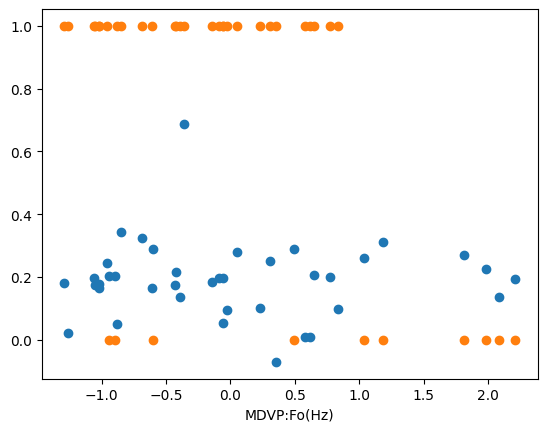

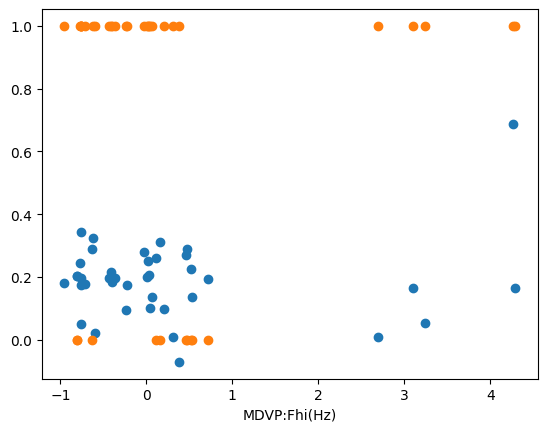

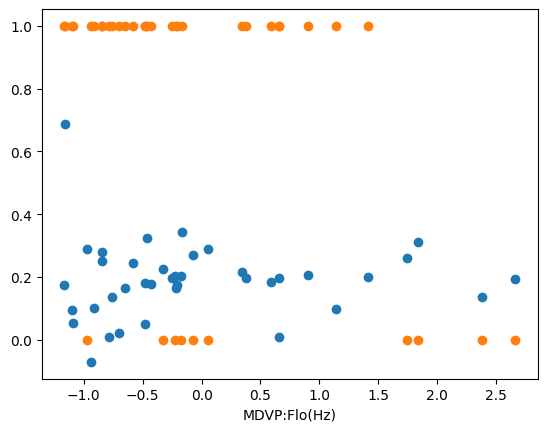

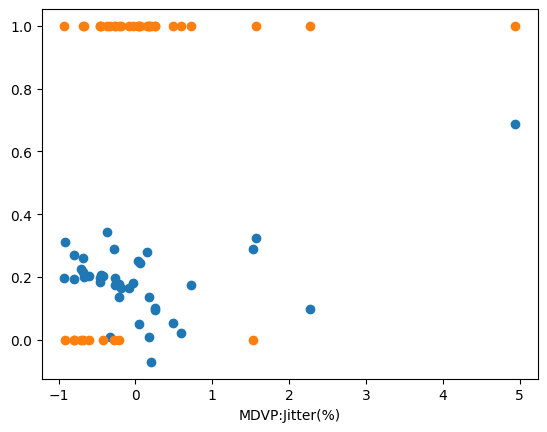

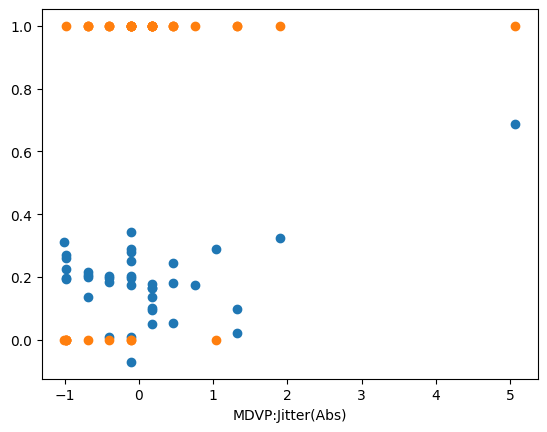

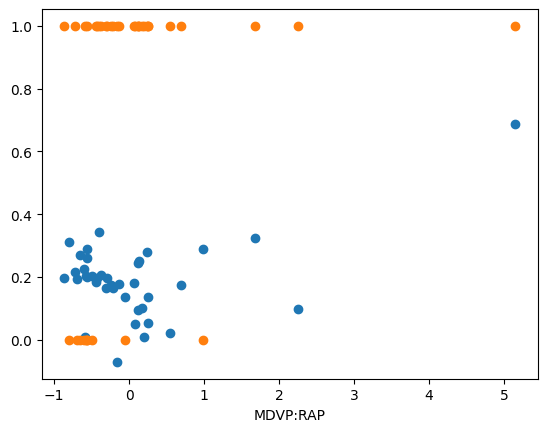

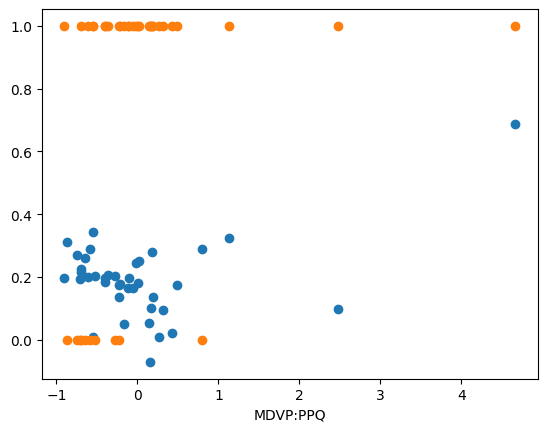

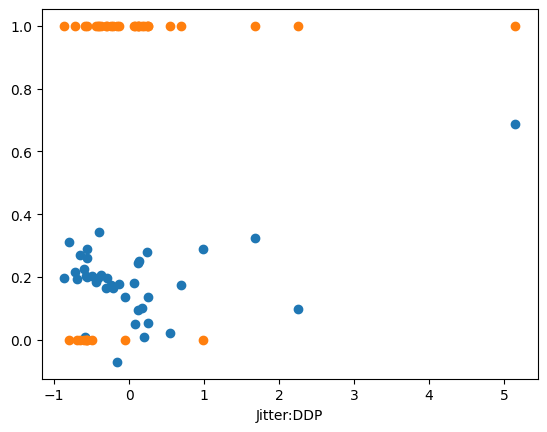

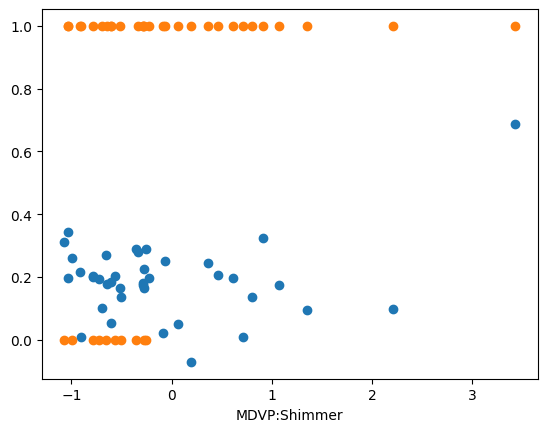

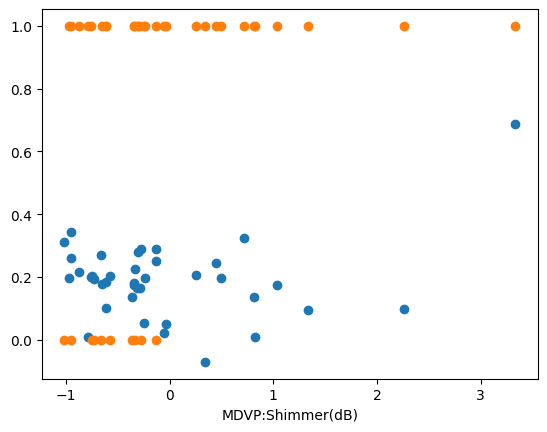

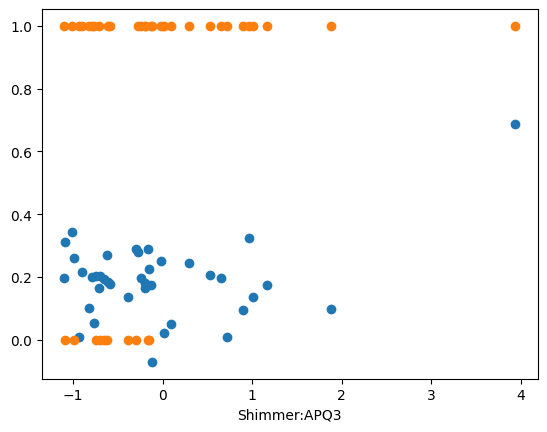

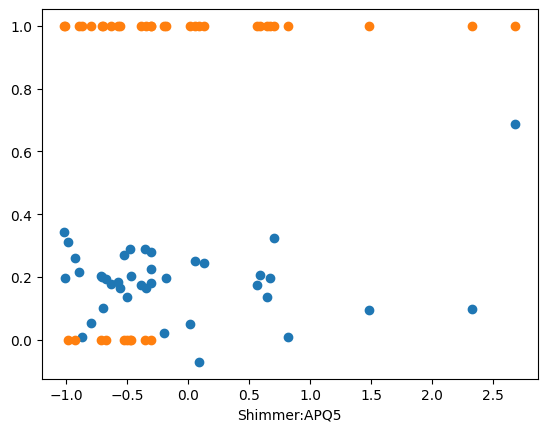

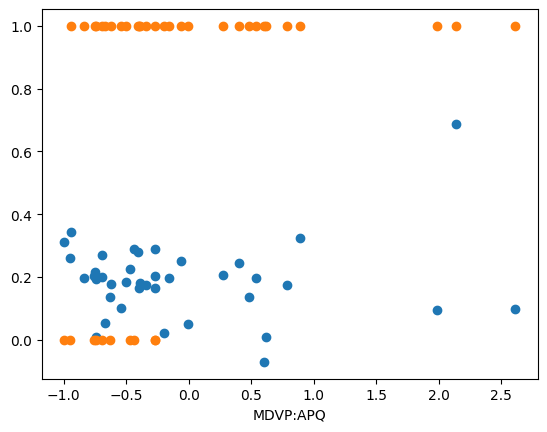

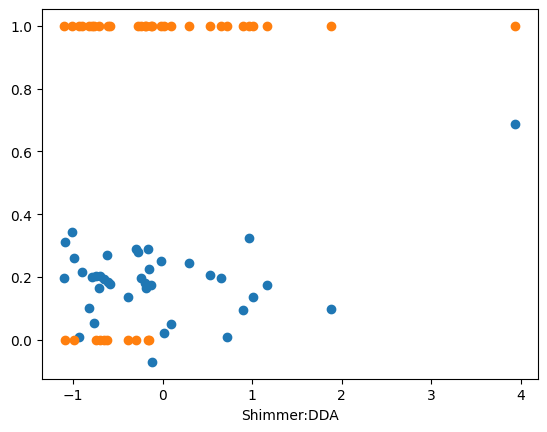

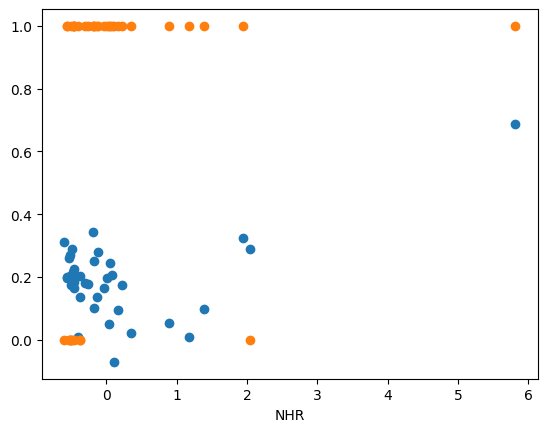

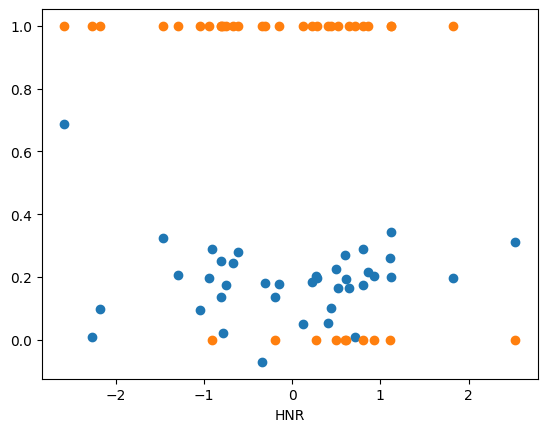

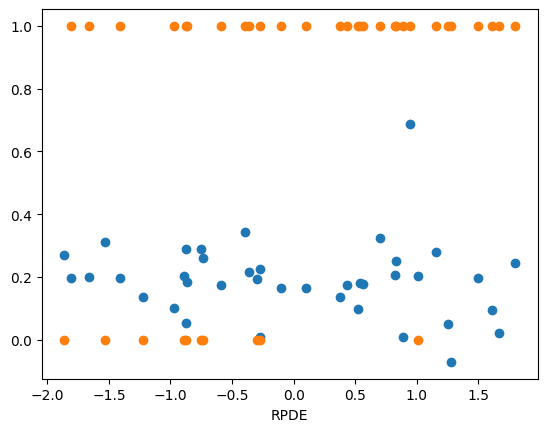

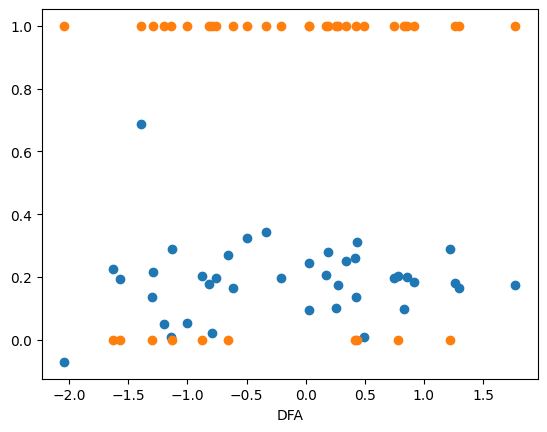

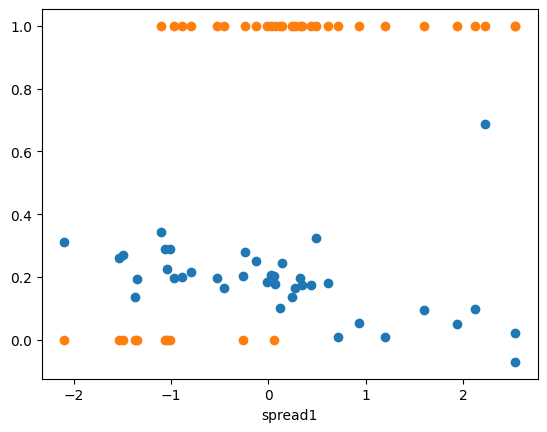

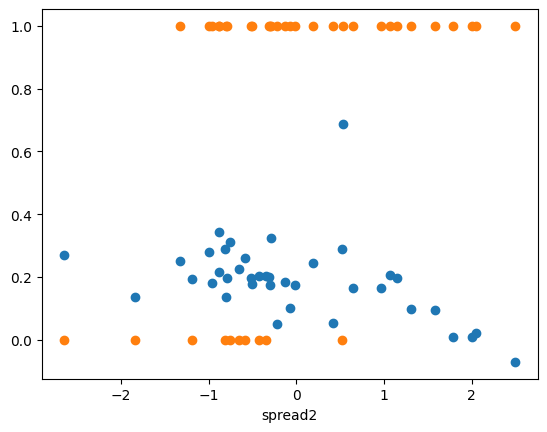

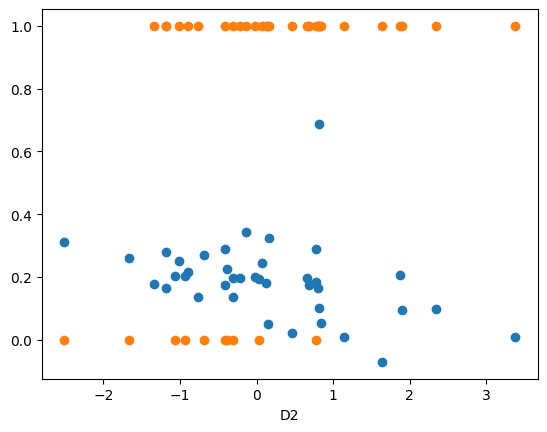

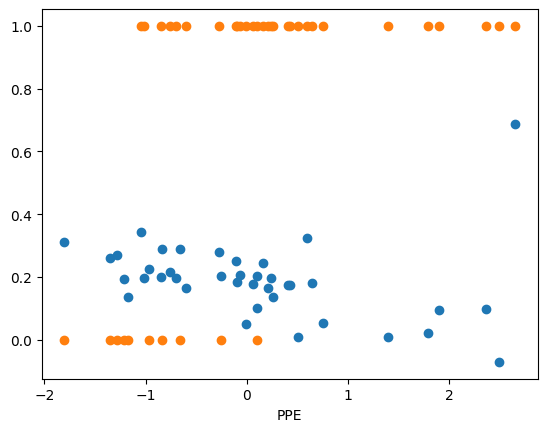

In [ ]:
#plots all the variables vs status overlayed with the models predictions
feature_names = df.columns.tolist()
for i in range(22):
  plt.figure()
  plt.scatter(X_test[:, i].detach().numpy(),y_preds.detach().numpy())
  plt.scatter(X_test[:, i].detach().numpy(),y_test)
  plt.xlabel(feature_names[columns_to_select[i]])

Here, it becomes clear that the thing we're predicting is binary: 0 or 1 (no parkinsons or parkinsons), but our model is assigning predictions to values in between and that's not that useful. I'm going to try to add in a threshold to ensure that the model outputs either 0 or 1, not in between.

# Model 1

In [ ]:
# Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=22, out_features=7),

    nn.RReLU(), #this will make our nn more like BART,
    #except with diagonal lines instead of veritcal lines

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_1.train()

    # 1. Forward pass; makes predictions
    y_pred = model_1(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_1.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_1(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred.squeeze(), y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 1.10515, Test loss: 1.19278
Epoch: 200 | Train loss: 0.96085, Test loss: 1.03113
Epoch: 400 | Train loss: 0.84094, Test loss: 0.90982
Epoch: 600 | Train loss: 0.75780, Test loss: 0.81312
Epoch: 800 | Train loss: 0.68545, Test loss: 0.73561
Epoch: 1000 | Train loss: 0.62452, Test loss: 0.67114
Epoch: 1200 | Train loss: 0.57335, Test loss: 0.61581
Epoch: 1400 | Train loss: 0.53264, Test loss: 0.56799
Epoch: 1600 | Train loss: 0.49196, Test loss: 0.52654
Epoch: 1800 | Train loss: 0.45848, Test loss: 0.48983


In [ ]:
# Convert raw model predictions to binary (0 or 1)

model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
    y_preds_binary = (y_preds > 0.5).float()  # Threshold at 0.5

<ipython-input-41-6e10dbc77f4b>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


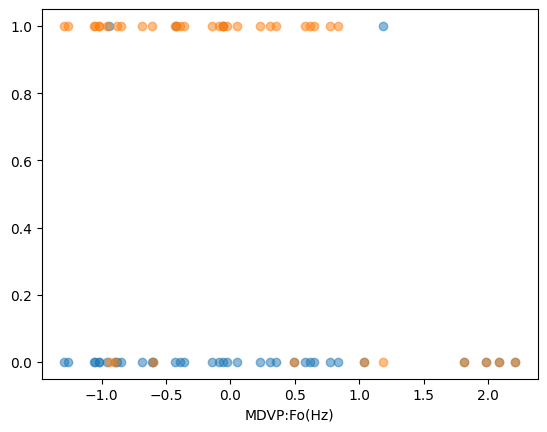

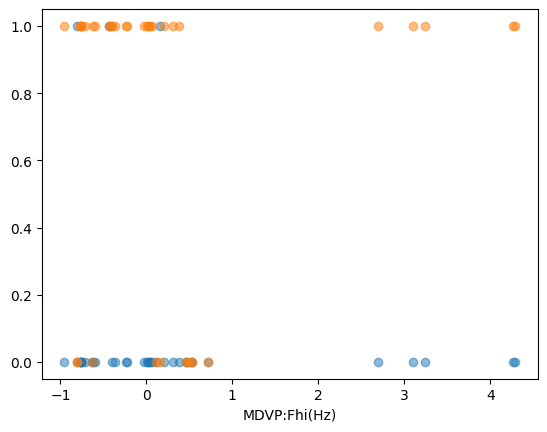

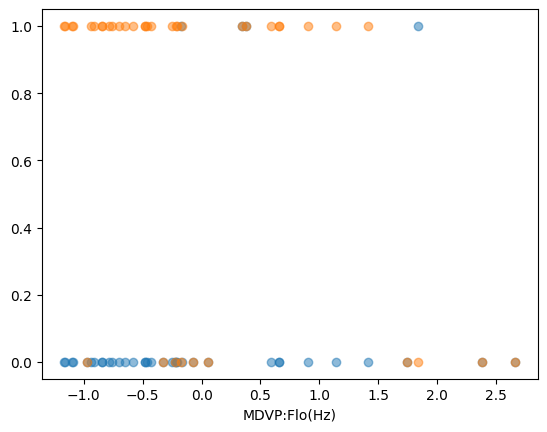

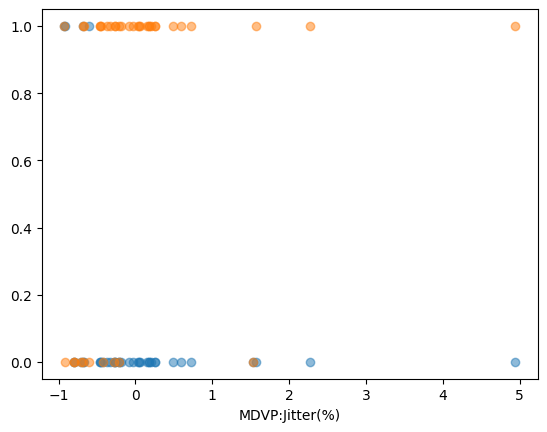

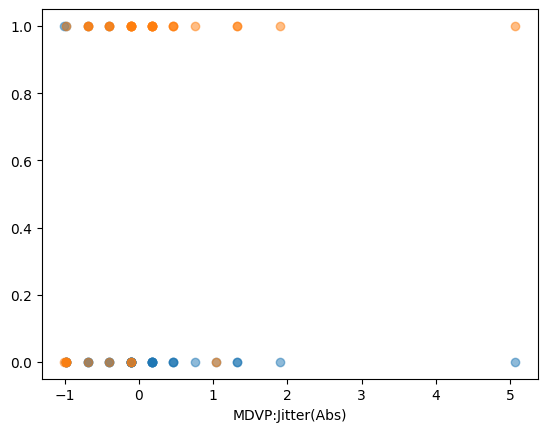

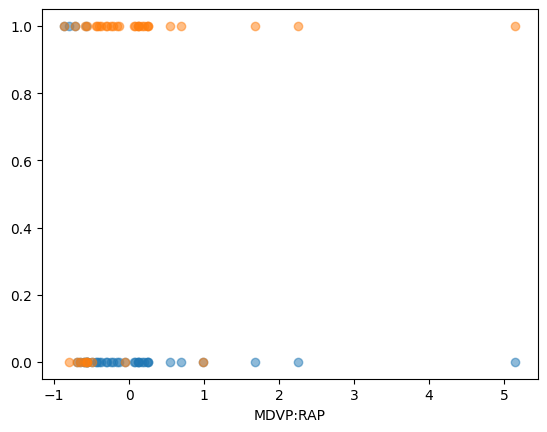

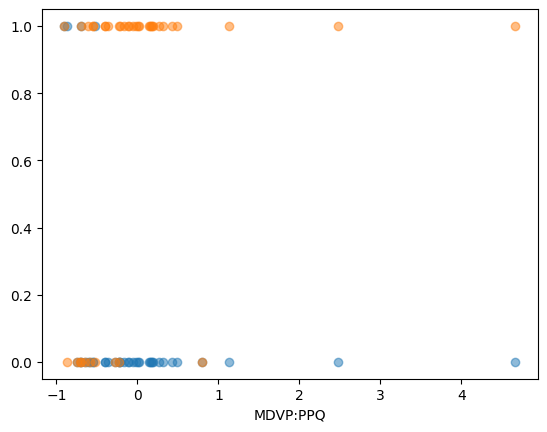

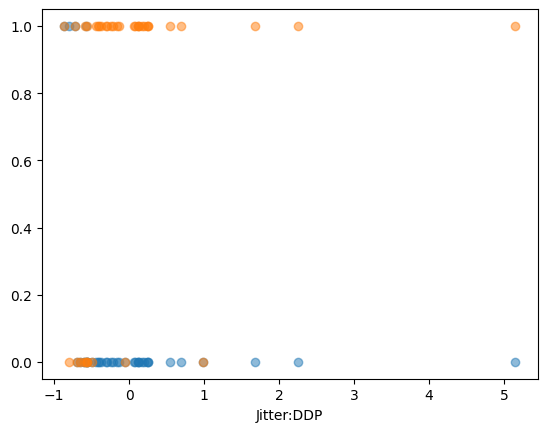

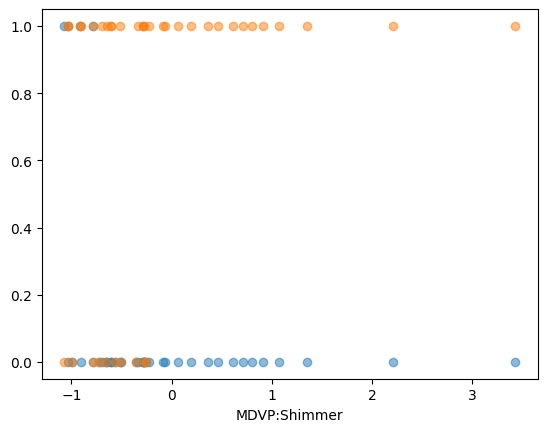

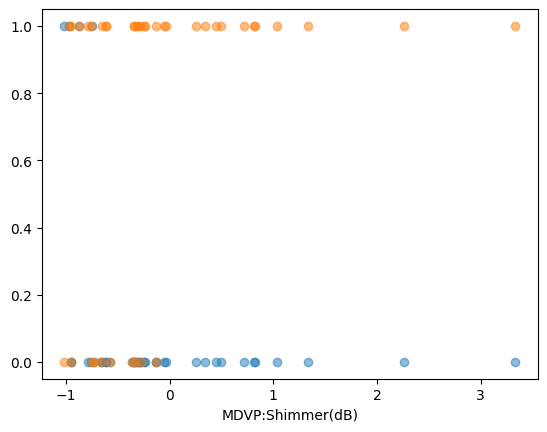

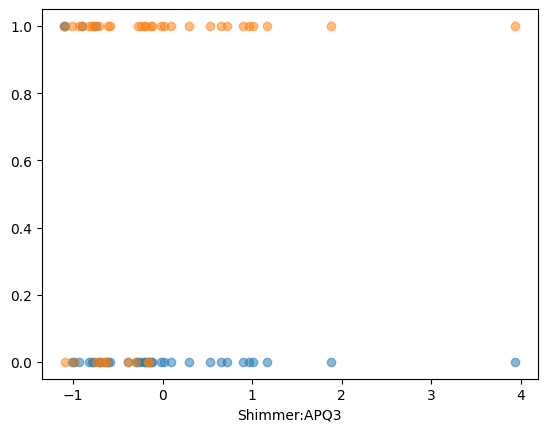

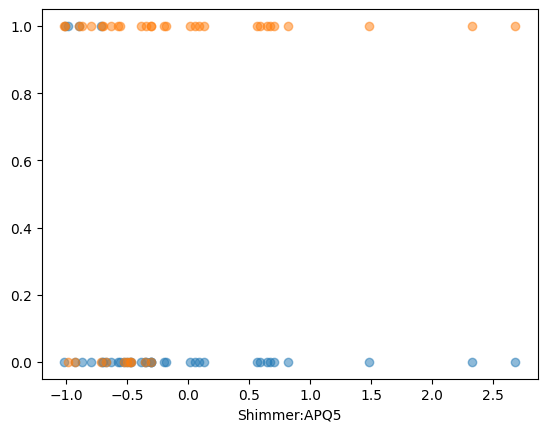

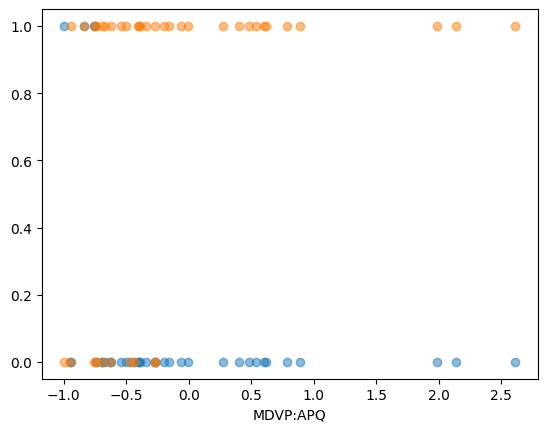

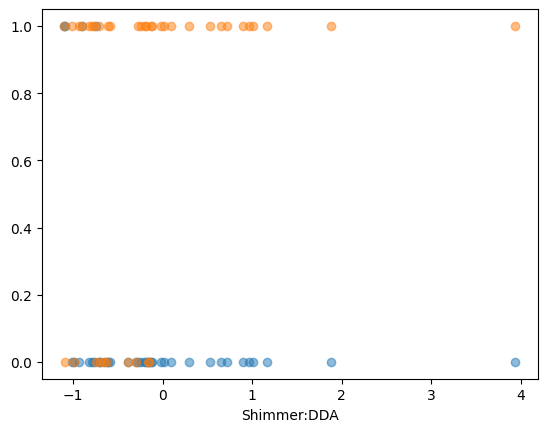

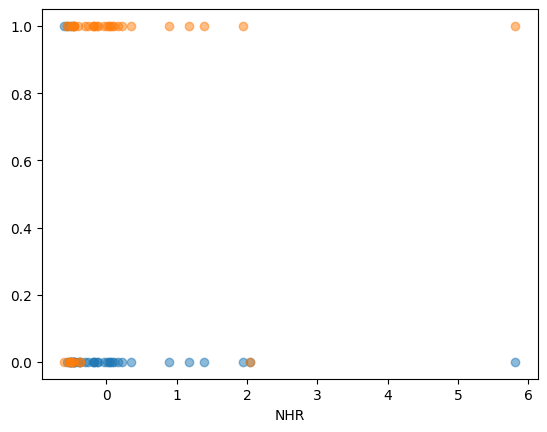

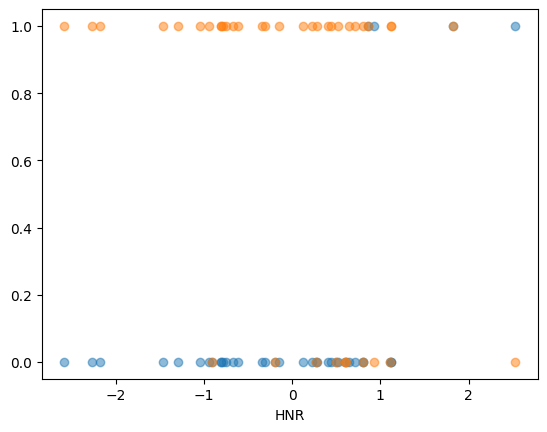

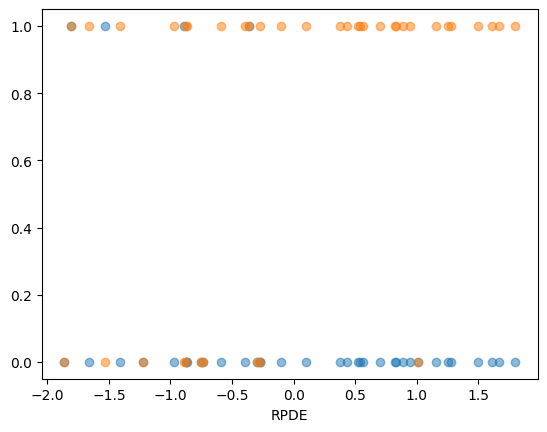

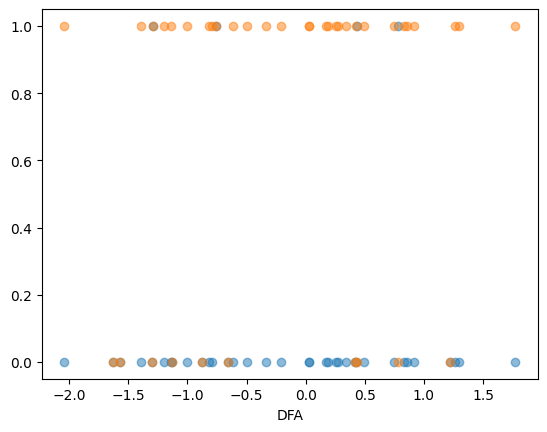

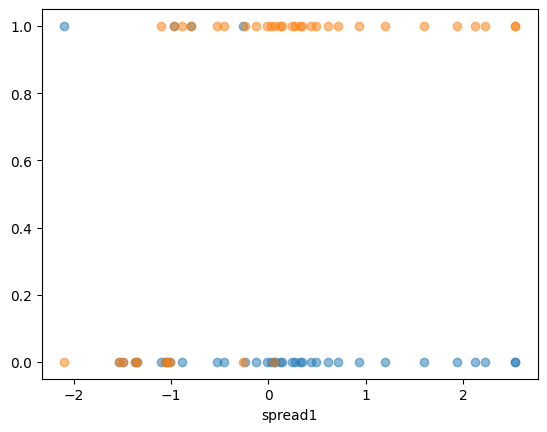

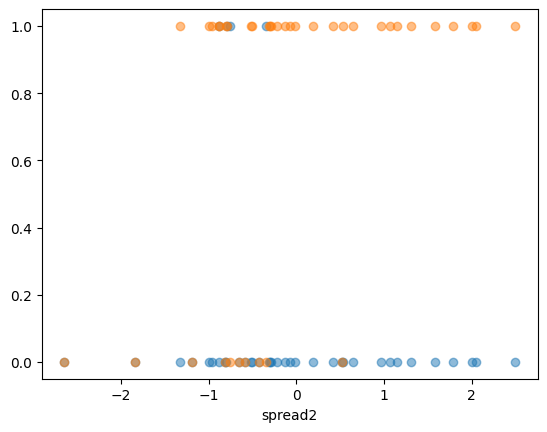

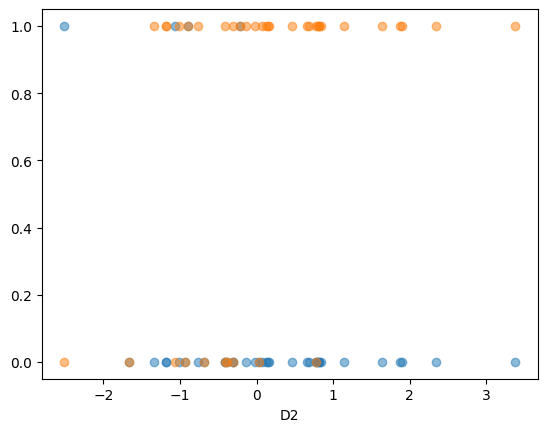

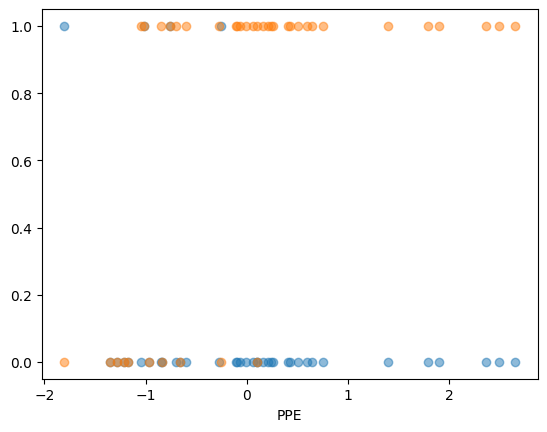

In [ ]:
#orange is the data, blue is the model

#plots all the variables vs status overlayed with the models predictions
feature_names = df.columns.tolist()
for i in range(22):
  plt.figure()
  plt.scatter(X_test[:, i].detach().numpy(),y_preds_binary.detach().numpy(), alpha = .5)  #plot the binary
  #plt.scatter(X_test[:, i].detach().numpy(),y_preds.detach().numpy(), alpha = .5)        #plot the raw
  plt.scatter(X_test[:, i].detach().numpy(),y_test, alpha = .5)
  plt.xlabel(feature_names[columns_to_select[i]])

This model still has a test loss of around .49. I want to bring this down. I'm going to try adding more layers or neurons.

# Model 2

In [ ]:
# Two layer nn with nn.Sequential
model_2 = nn.Sequential(

    nn.Linear(in_features=22, out_features=32),
    nn.RReLU(), #this will make our nn more like BART,
    #except with diagonal lines instead of veritcal lines

    nn.Linear(in_features=32, out_features=16),
    nn.RReLU(),

    nn.Linear(in_features=16, out_features=8),
    nn.RReLU(),

    nn.Linear(in_features=8, out_features=1),
)

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_2.train()

    # 1. Forward pass; makes predictions
    y_pred = model_2(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_2.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_2(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred.squeeze(), y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 1.02015, Test loss: 1.01678
Epoch: 200 | Train loss: 0.92205, Test loss: 0.92103
Epoch: 400 | Train loss: 0.83453, Test loss: 0.83542
Epoch: 600 | Train loss: 0.75554, Test loss: 0.75883
Epoch: 800 | Train loss: 0.68612, Test loss: 0.69051
Epoch: 1000 | Train loss: 0.62365, Test loss: 0.62967
Epoch: 1200 | Train loss: 0.56925, Test loss: 0.57538
Epoch: 1400 | Train loss: 0.51934, Test loss: 0.52734
Epoch: 1600 | Train loss: 0.47458, Test loss: 0.48489
Epoch: 1800 | Train loss: 0.43665, Test loss: 0.44745


In [ ]:
# Convert raw model predictions to binary (0 or 1)

model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test)
    y_preds_binary = (y_preds > 0.5).float()  # Threshold at 0.5

<ipython-input-46-6e10dbc77f4b>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


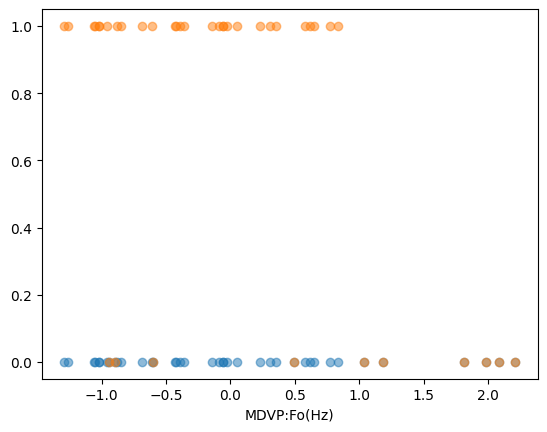

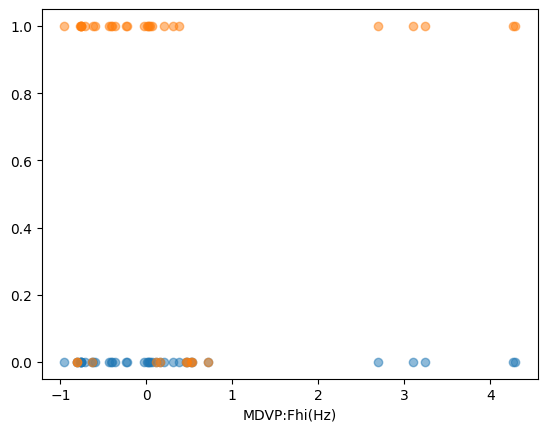

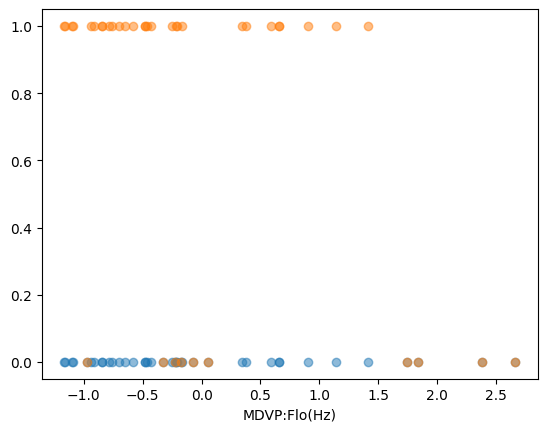

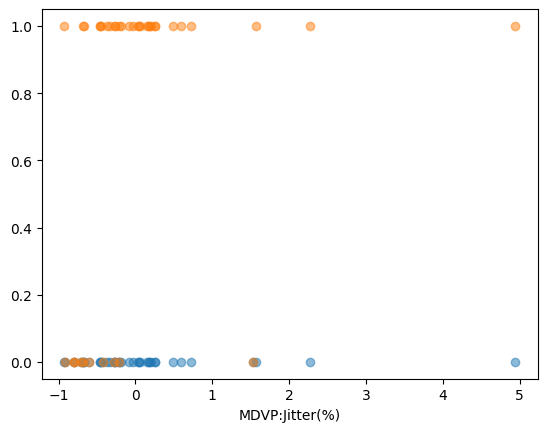

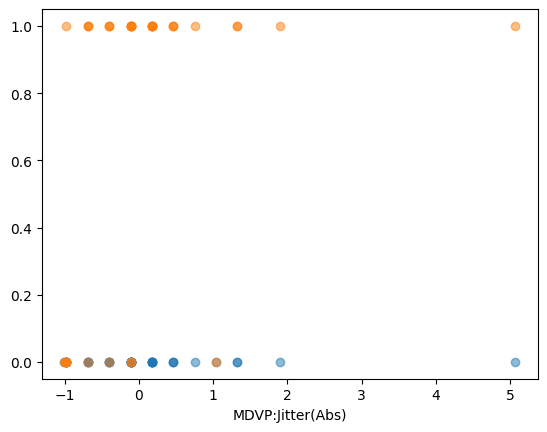

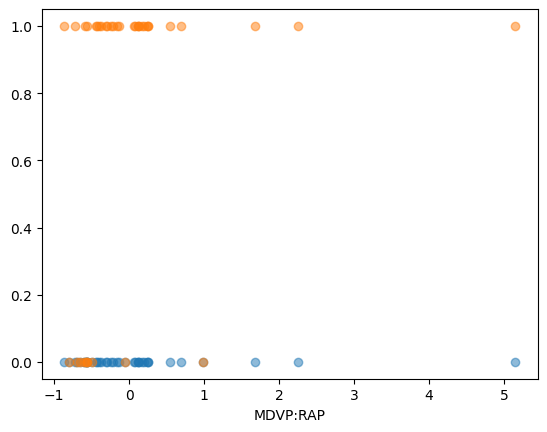

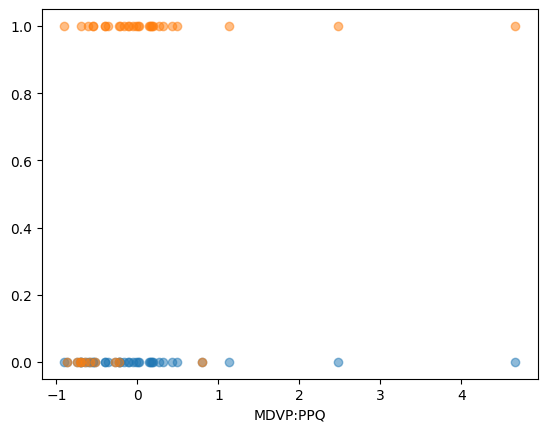

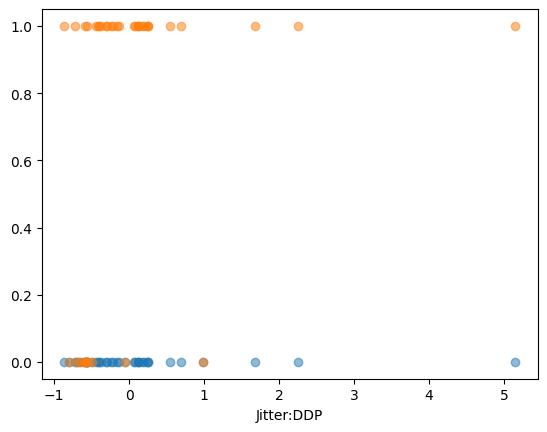

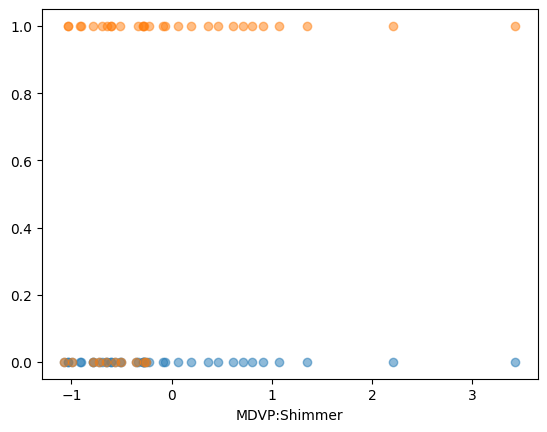

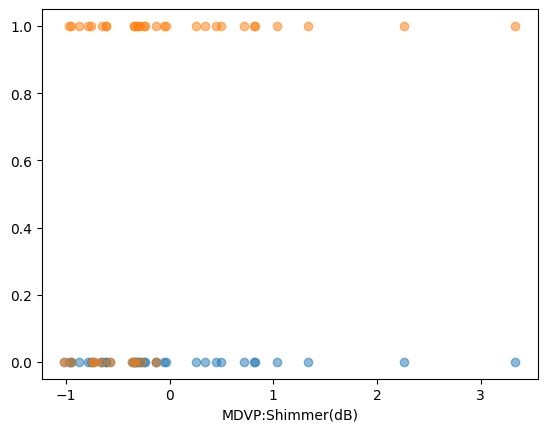

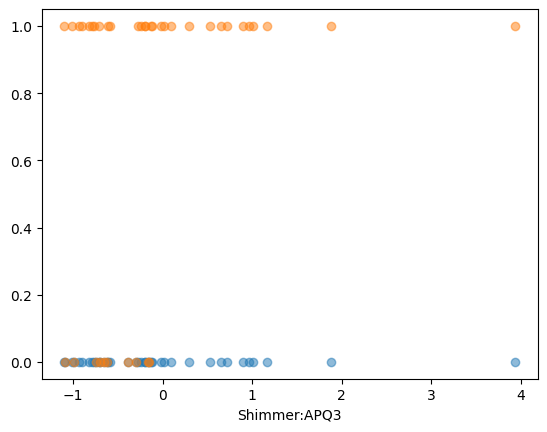

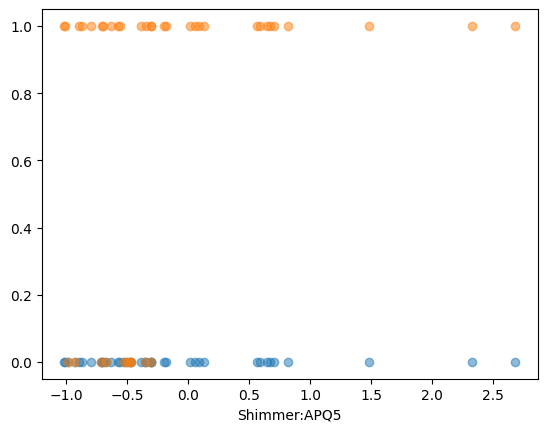

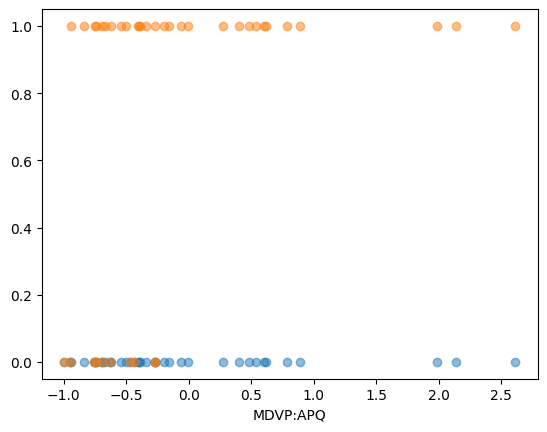

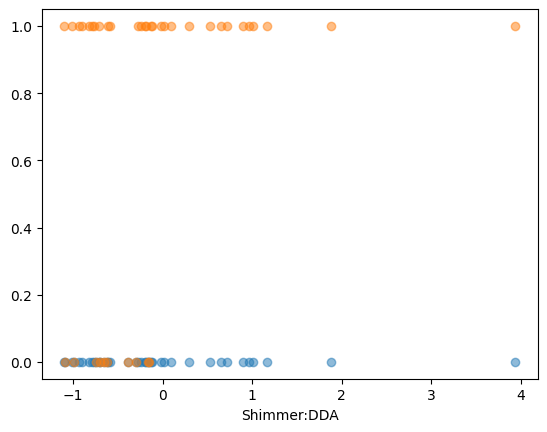

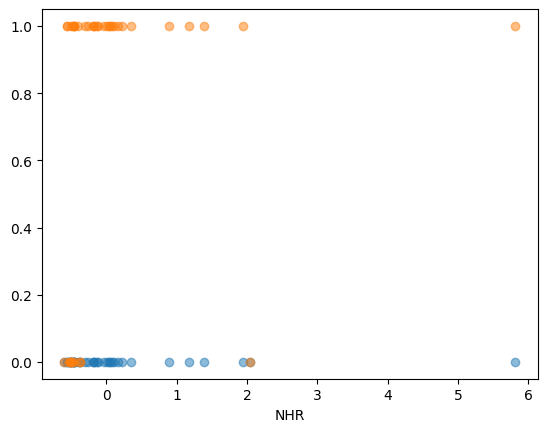

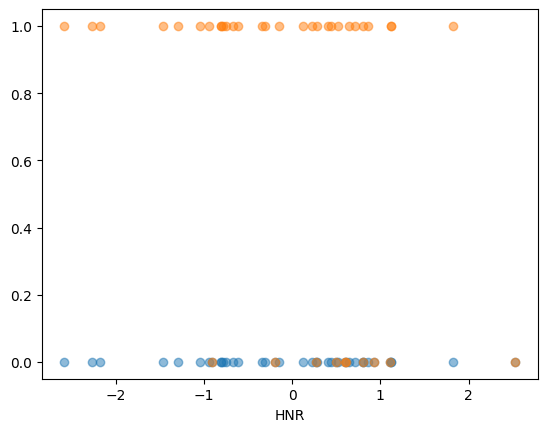

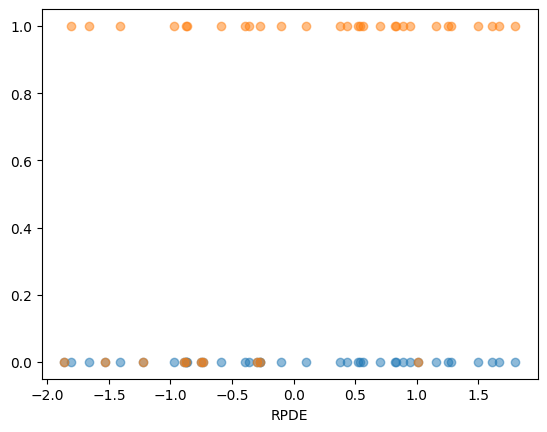

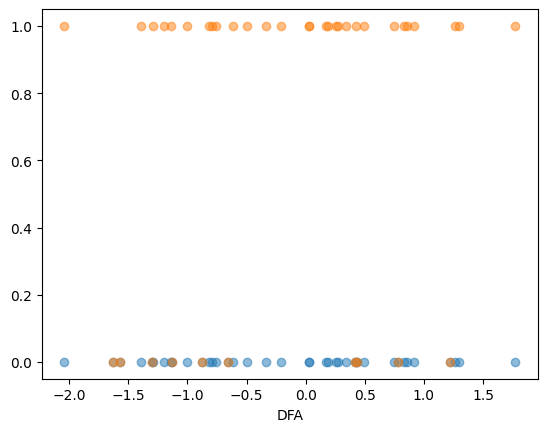

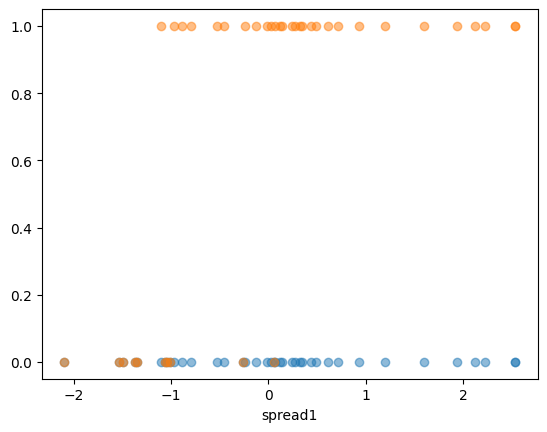

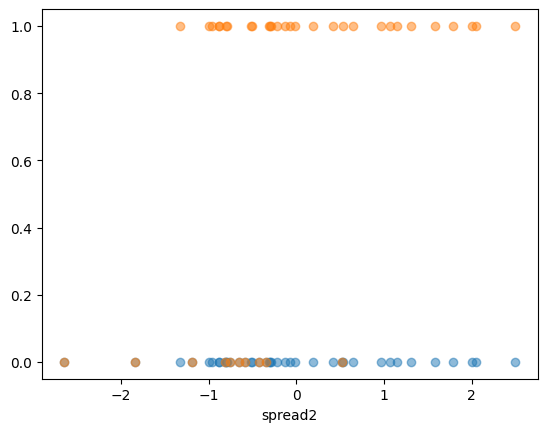

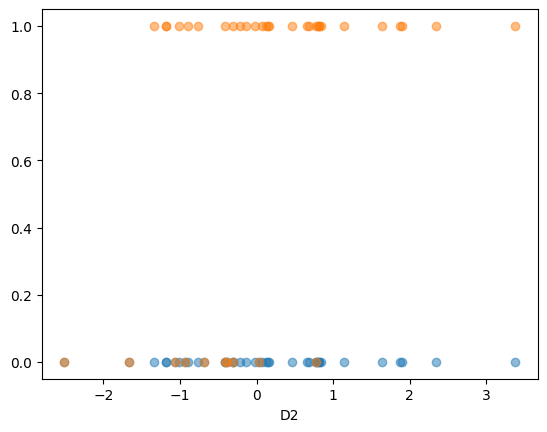

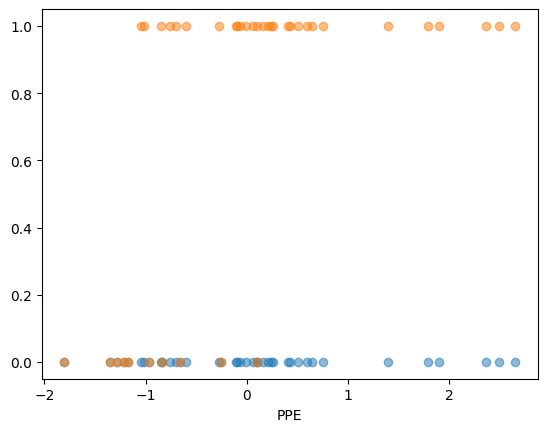

In [ ]:
#orange is the data, blue is the model

#plots all the variables vs status overlayed with the models predictions
feature_names = df.columns.tolist()
for i in range(22):
  plt.figure()
  plt.scatter(X_test[:, i].detach().numpy(),y_preds_binary.detach().numpy(), alpha = .5)  #plot the binary
  #plt.scatter(X_test[:, i].detach().numpy(),y_preds.detach().numpy(), alpha = .5)        #plot the raw
  plt.scatter(X_test[:, i].detach().numpy(),y_test, alpha = .5)
  plt.xlabel(feature_names[columns_to_select[i]])

I'm going to try changing the layers and number of neurons. Because test loss is still high. And running it for more epochs. I also realized that standardizing/scaling my input data helps the model, so I scaled the data before doing the train_test_split.

# Model 3

In [ ]:
# Two layer nn with nn.Sequential
model_3 = nn.Sequential(

    nn.Linear(in_features=22, out_features=100),
    nn.RReLU(), #this will make our nn more like BART,
    #except with diagonal lines instead of veritcal lines

    nn.Linear(in_features=100, out_features=200),
    nn.RReLU(),

    nn.Linear(in_features=200, out_features=50),
    nn.RReLU(),

    nn.Linear(in_features=50, out_features=1),
)

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 20000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_3.train()

    # 1. Forward pass; makes predictions
    y_pred = model_3(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_3.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_3(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred.squeeze(), y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.71592, Test loss: 0.70493
Epoch: 200 | Train loss: 0.64685, Test loss: 0.63743
Epoch: 400 | Train loss: 0.58931, Test loss: 0.58014
Epoch: 600 | Train loss: 0.53898, Test loss: 0.53090
Epoch: 800 | Train loss: 0.49503, Test loss: 0.48800
Epoch: 1000 | Train loss: 0.45629, Test loss: 0.45046
Epoch: 1200 | Train loss: 0.42290, Test loss: 0.41746
Epoch: 1400 | Train loss: 0.39211, Test loss: 0.38839
Epoch: 1600 | Train loss: 0.36555, Test loss: 0.36262
Epoch: 1800 | Train loss: 0.34302, Test loss: 0.33982
Epoch: 2000 | Train loss: 0.32147, Test loss: 0.31962
Epoch: 2200 | Train loss: 0.30340, Test loss: 0.30169
Epoch: 2400 | Train loss: 0.28612, Test loss: 0.28582
Epoch: 2600 | Train loss: 0.27183, Test loss: 0.27170
Epoch: 2800 | Train loss: 0.25900, Test loss: 0.25913
Epoch: 3000 | Train loss: 0.24735, Test loss: 0.24801
Epoch: 3200 | Train loss: 0.23700, Test loss: 0.23814
Epoch: 3400 | Train loss: 0.22666, Test loss: 0.22942
Epoch: 3600 | Train loss: 0.21990, 

In [ ]:
# Convert raw model predictions to binary (0 or 1)

model_3.eval()
with torch.inference_mode():
    y_preds = model_3(X_test)
    y_preds_binary = (y_preds > 0.5).float()  # Threshold at 0.5

<ipython-input-51-6e10dbc77f4b>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


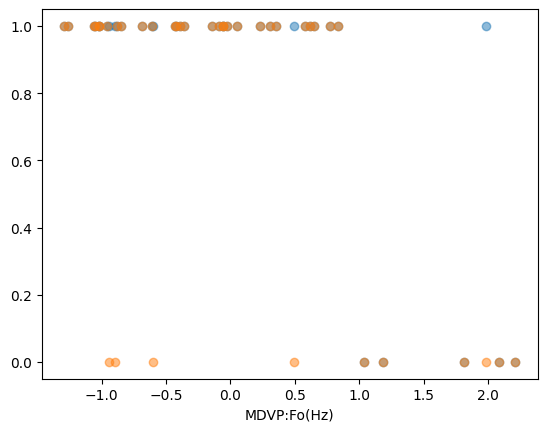

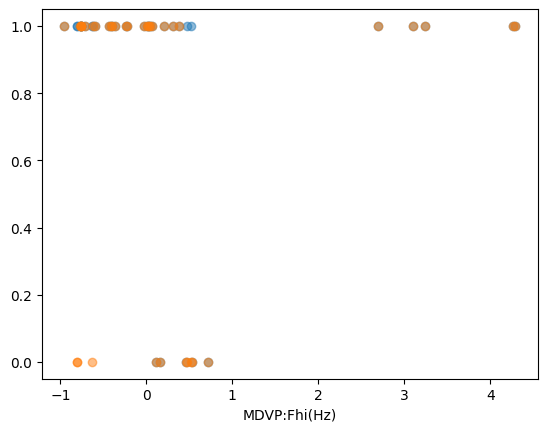

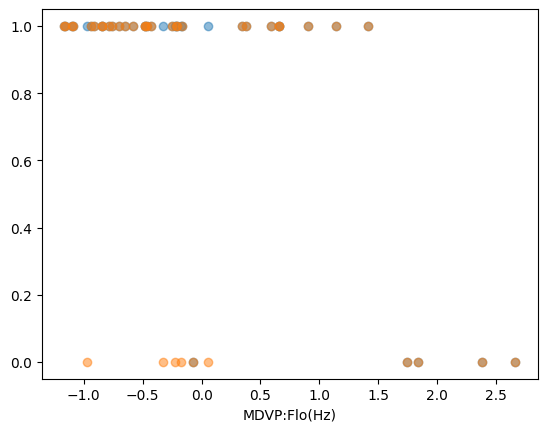

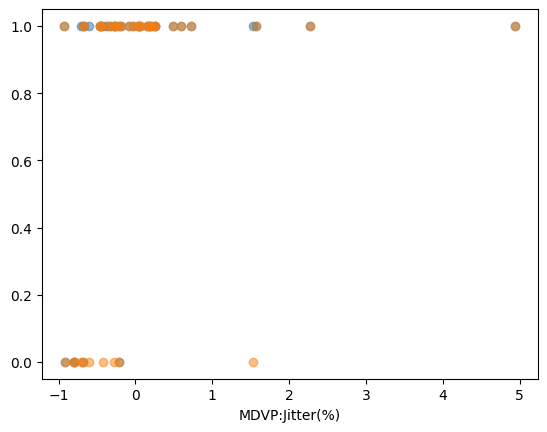

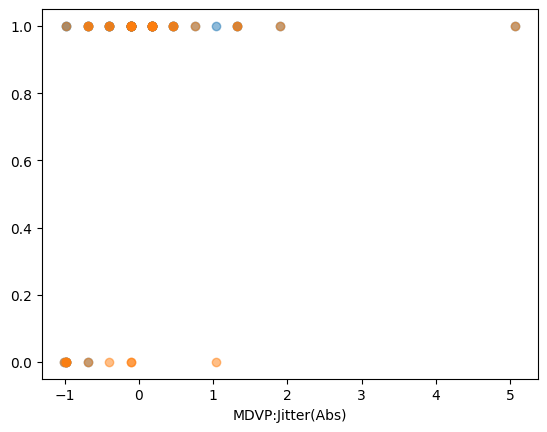

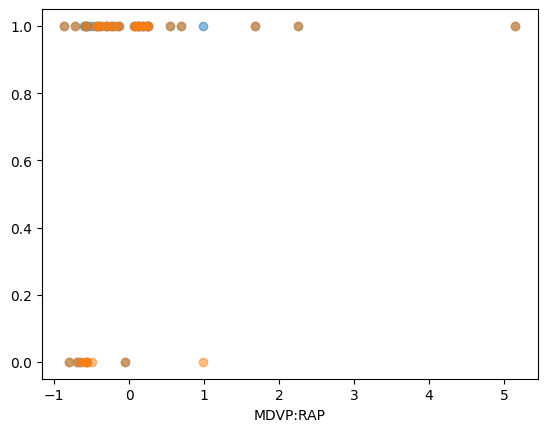

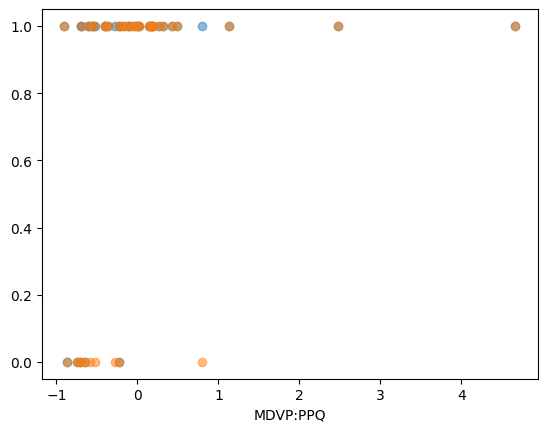

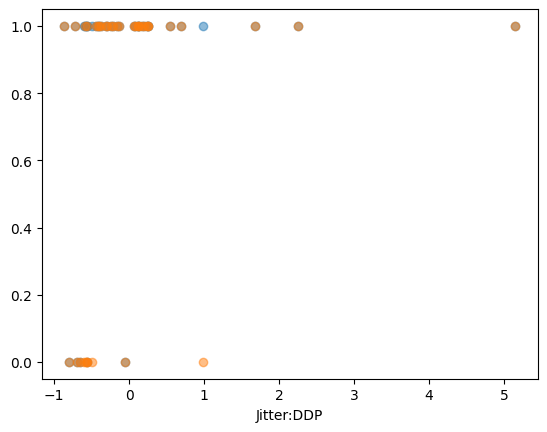

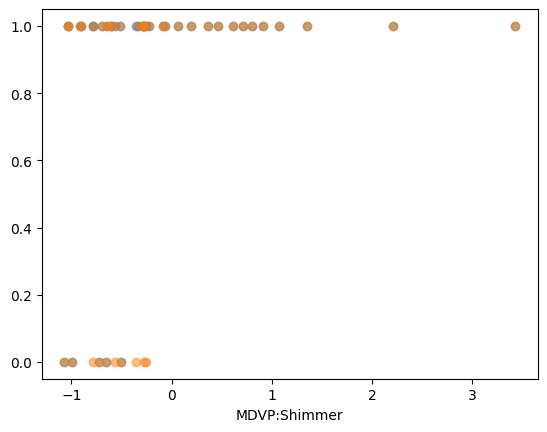

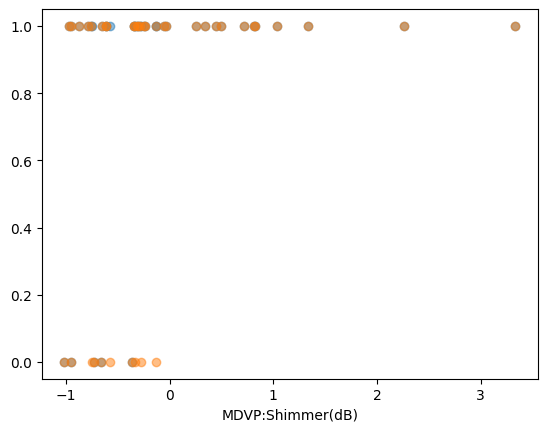

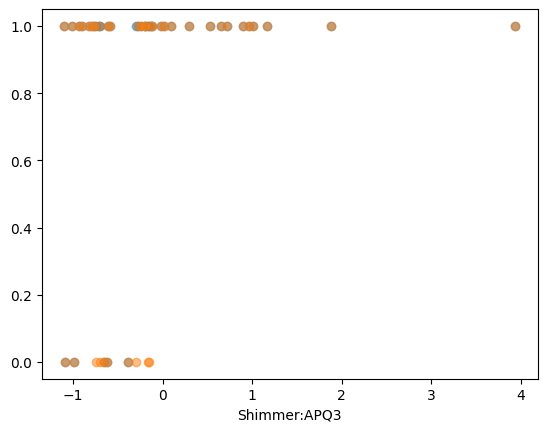

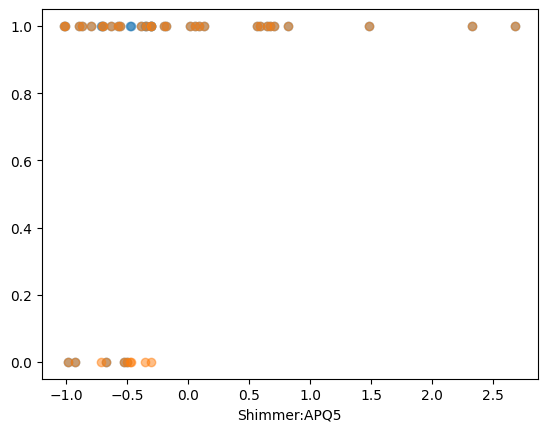

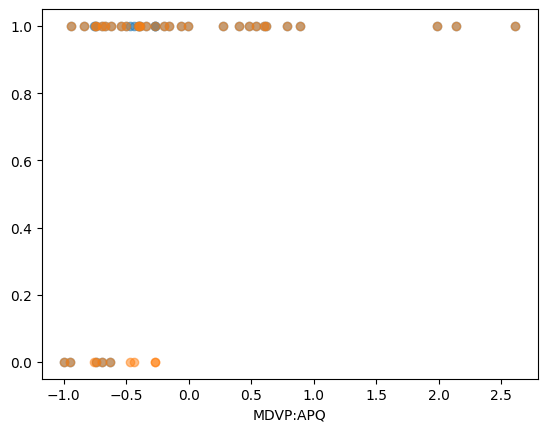

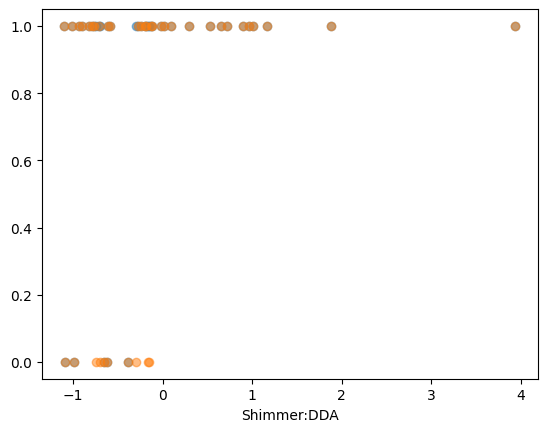

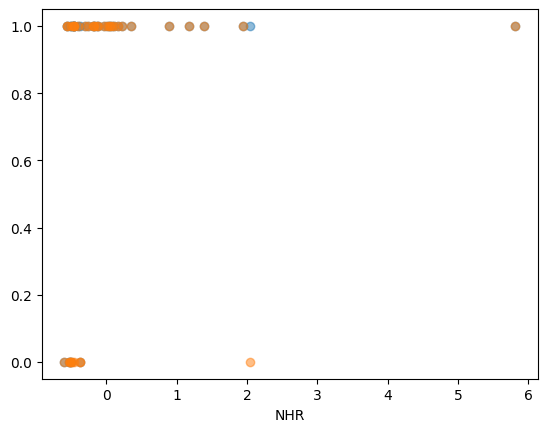

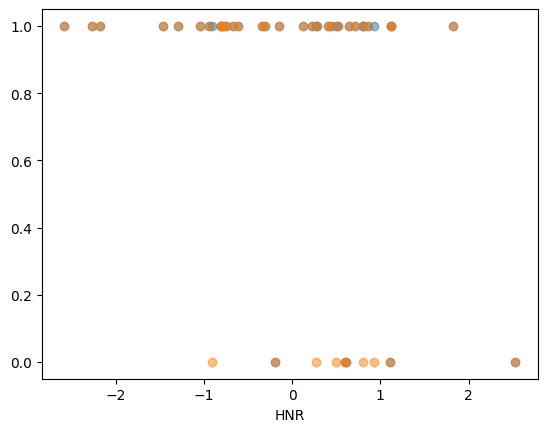

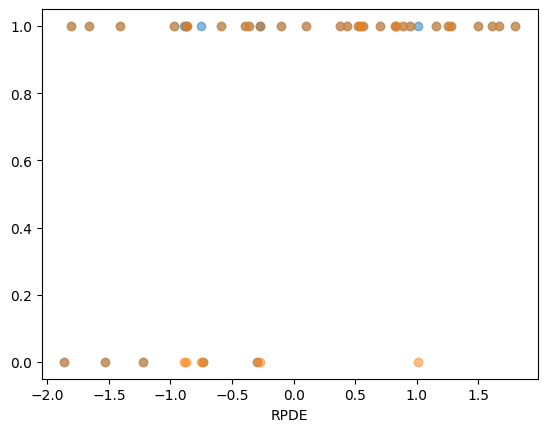

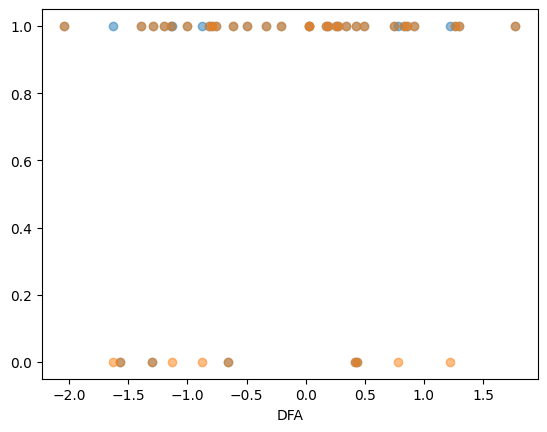

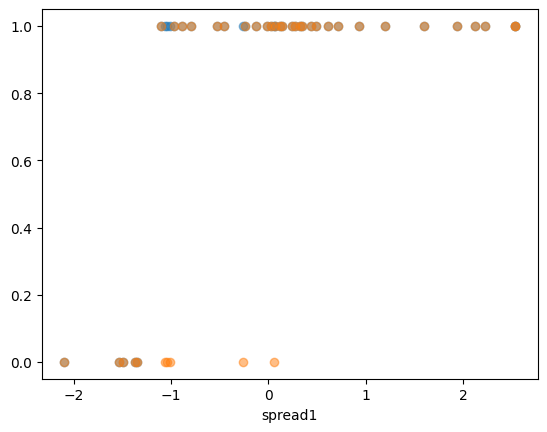

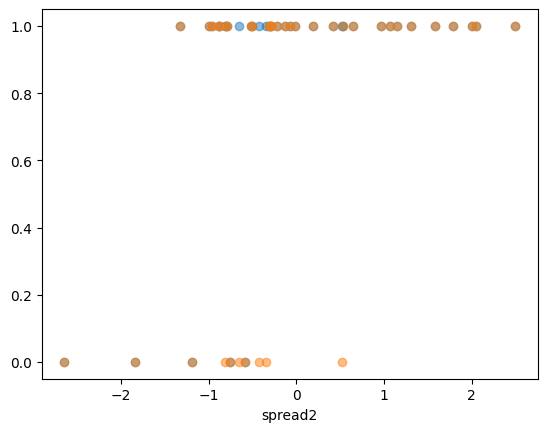

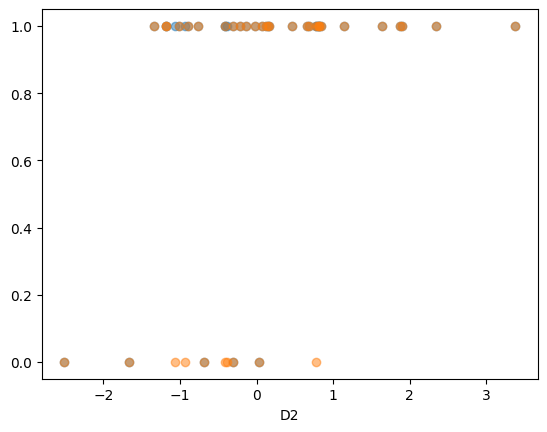

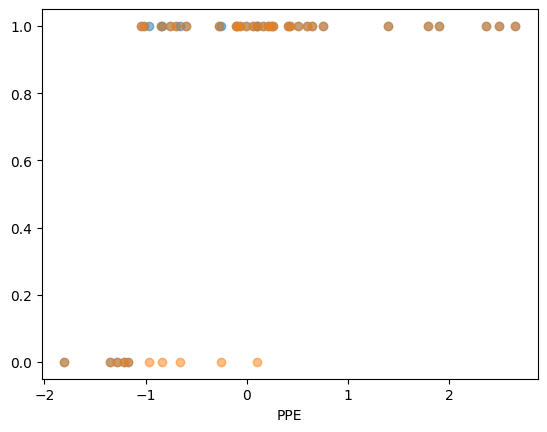

In [ ]:
#orange is the data, blue is the model

#plots all the variables vs status (parkinsons or not) overlayed with the models predictions
feature_names = df.columns.tolist()
for i in range(22):
  plt.figure()
  plt.scatter(X_test[:, i].detach().numpy(),y_preds_binary.detach().numpy(), alpha = .5)  #plot the binary
  #plt.scatter(X_test[:, i].detach().numpy(),y_preds.detach().numpy(), alpha = .5)        #plot the raw
  plt.scatter(X_test[:, i].detach().numpy(),y_test, alpha = .5)
  plt.xlabel(feature_names[columns_to_select[i]])

On, this model, the test loss is down into the .12s, a huge improvement from before. If you run it for even more epochs, it continues improving, to below .1. In the plots, we can see its success in that there are very few just blue or just orange dots like before and instead there are more brownish dots from the orange and blue mixing becuase the model is predicting those correctly.

# Conclusion

My model with 3 hidden layers that increase in nodes and then come back down
(100 neurons, then 200, then 50) performed the best. I was able to bring the test loss down to under .1. Also, I learned that it is important to scale the input data with StandardScaler. Additionally, with more epochs, almost all of the models can improve to much lower tests losses, but some do better than others.

Just by looking at the data, it appears that certain voice features are quite relevant to predicting Parkinson's like PPE, D2, spread1, spread2. Some variables don't appear to have as clear patterns visually like, DFA, RPDE, HNR, Flo, Fhi, Fo. Most of the rest tend to follow similar patterns where those without Parkinson's have data centered at lower numbers with little variation, while some of those with Parkinsons have data for the same feature at much higher values (along with lower values, but there's just more variation).

Even though some trends are discernable from the plots (as mentioned in the previous paragraph), because I didn't have much prior knowledge on data related to voice and Parkinson's, this model still takes in all the input features instead of choosing a few. The model can handle this because of the power that comes with neural networks.

Some caveats with this model are that although its a good fit on the test data, since this data is only from 31 individuals, we cannot generalize its results to all people without further testing.